In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import numpy as np
from scipy.optimize import Bounds
from scipy.optimize import minimize
from matplotlib.pyplot import figure
from scipy.optimize import curve_fit

# Задание 2

#### Цех может производить стулья и столы. На производство стула идет 5 единиц материала, на производство стола - 20 единиц (футов красного дерева). Стул требует 10 человеко-часов, стол - 15. Имеется 400 единиц материала и 450 человеко-часов. Прибыль при производстве стула - 45 долларов США, при производстве стола - 80 долларов США. Сколько надо сделать стульев и столов, чтобы получить максимальную прибыль?

In [2]:
# Задаем целевую функцию:
# Цех производит два вида продукции:
# x0 — стулья, от 45 дол.
# x1 — столы, от 80 дол.

def value(x):
    return - 45*x[0] - 80*x[1]

In [3]:
# Задаем систему ограничений:
# Дружный рабочий коллектив включает в себя четырех джунов, двух мидлов и одного сеньора. 
# Фонд их рабочего времени на месяц:
# столы: 4 * 150 = 600 чел * час,
# мидлы: 2 * 150 = 300 чел * час,
# сеньор: 150 чел * час.

#Пусть на разработку и деплой одного сайта типа (x0, x1, x2) первый попавшийся джуниор 
# должен потратить (10, 20, 30) часов, мидл — (7, 15, 20), сеньор — (5, 10, 15) часов рабочего времен.

neq_cons = {'type': 'ineq',
             'fun': lambda x: np.array ([400 - 5 * x [0] - 20 * x [1],
                                         450 - 10  * x [0] - 15 * x [1]])}

In [4]:
# Формальное ограничение — выпуск продукции должен быть только положительным:
from scipy.optimize import Bounds
bnds = Bounds([0, 0], [np.inf, np.inf])

In [5]:
# Максимизируем функцию ежемесячной прибыли
x0 = np.array([20, 15])
res = minimize(value, x0, method='SLSQP', constraints=neq_cons, bounds=bnds)
print(res.x)

[24. 14.]


In [6]:
print('материалы:', 24 * 5 + 14 * 20, 'футов красного дерева')
print('часы:', 24 * 10 + 14 * 15 , 'чел.*час')
print('максимизированная прибыль составит:', -1*value([24, 14]),'тыс.руб./месяц')

материалы: 400 футов красного дерева
часы: 450 чел.*час
максимизированная прибыль составит: 2200 тыс.руб./месяц


#### Вывод: для получения максимальной прибыли оптимальный выпуск будет составлять 24 стула и 14 столов. При этом используется весь материал и все трудовые ресурсы, а прибыль будет равна 2200 долларам.

# Задание 3

#### Средний накопленный доход на пользователя с сайта (cumulative ARPU) составил: day1 -  0.4дол, day3 -  0.6 дол., day7  - 0.8 дол., day14 - 1.10дол. , day21 - 1.30 дол., day30 - 1.40 дол. Подберите аппроксимирующую кривую и сделайте прогноз, сколько в среднем принесет денег пользователь на 90й день. Обоснуйте выбор одной из аппроксимирующей кривой вида: y = a*b^x или y = a*ln(x) + b. 

In [7]:
df = pd.DataFrame({'day': [1,3,7,14,21,30],
                   'ARPU': [0.4,0.6,0.8,1.10,1.30,1.40]})
df.head(6)

,day,ARPU
0,1,0.4
1,3,0.6
2,7,0.8
3,14,1.1
4,21,1.3
5,30,1.4


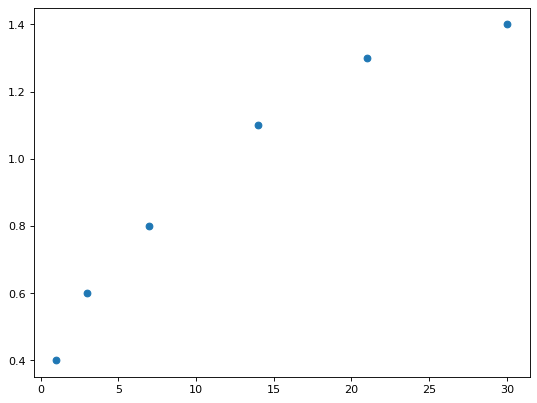

In [8]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df['day'], df['ARPU'], label="Original Data" )

In [9]:
# задаем аппроксимирующую логарифмияескую функцию
def log_func( x, a, b ):
    return a * np.log(x) + b

In [10]:
# задаем аппроксимирующую степенную функцию
def sqrt_func( x, a, b):
    return a * b ** x

In [11]:
log_popt, log_pcov = curve_fit(log_func, df['day'], df['ARPU'])

In [12]:
sqrt_popt, sqrt_pcov = curve_fit(sqrt_func, df['day'], df['ARPU'])

In [13]:
projection_endpoint = 90

In [14]:
log_y_projected = log_func( np.arange( projection_endpoint ), *log_popt )
sqrt_y_projected = sqrt_func( np.arange( projection_endpoint ), *sqrt_popt )

/var/folders/h9/dr0bspp11z53mwzrlvr3q19w0000gn/T/ipykernel_31107/3433126870.py:3: RuntimeWarning: divide by zero encountered in log
  return a * np.log(x) + b


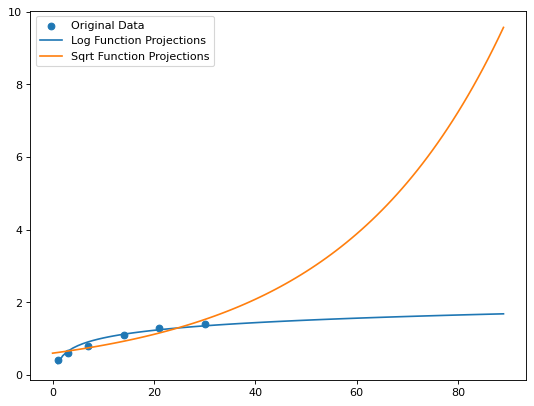

In [15]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df['day'], df['ARPU'], label="Original Data" )
plt.plot( log_y_projected, label="Log Function Projections" )
plt.plot( sqrt_y_projected, label="Sqrt Function Projections" )
plt.legend()
plt.show()

In [16]:
print('Прогноз кол-ва денег на 90й день по log модели', round(log_y_projected[89],0))
print('Прогноз кол-ва денег на 90й день по sqrt модели', round(sqrt_y_projected[89],0))

Прогноз кол-ва денег на 90й день по log модели 2.0
Прогноз кол-ва денег на 90й день по sqrt модели 10.0


In [17]:
y_log_pred = [log_y_projected[ i ] for i in list(df['day'])]
y_log_pred

[0.3182915337381341,
 0.6525362974984633,
 0.9103204822385534,
 1.121205448670408,
 1.2445652459988827,
 1.3530809922778193]

In [18]:
y_sqrt_pred = [sqrt_y_projected[ i ] for i in list(df['day'])]
y_sqrt_pred

[0.6193285013669545,
 0.659088716032839,
 0.7464307044090908,
 0.9280456295448732,
 1.153849493904676,
 1.5266933282102846]

#### Вывод: логарифмическая функция аппроксимирует исследуемую зависимость с меньшей ошибкой, поэтому целесообразнее использовать для прогноза данную функцию.